# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# importing the dataset as a dataframe
df = pd.read_csv("london_house_prices.csv")
df

,id,date,postcode,property_type,whether_old_or_new,freehold_or_leasehold,address1,address2,address3,town,...,district,latitude,longitude,altitude,london_zone,nearest_station,distance_to_station,water_company,average_income,pricePerSqmtr
0,{9DBAD222-2B84-6EB3-E053-6B04A8C0F257},2020-01-06T00:00:00Z,BR1 1AA,F,N,L,HENRY HOUSE,FLAT 19,RINGERS ROAD,NaN,...,Bromley,51.401546,0.015415,71,5,Bromley South,0.218257,Thames Water,63100,2212.121212
1,{7E86B6FB-423C-458C-E053-6B04A8C0C84C},2018-11-30T00:00:00Z,BR1 1AA,F,N,L,HENRY HOUSE,FLAT 28,RINGERS ROAD,NaN,...,Bromley,51.401546,0.015415,71,5,Bromley South,0.218257,Thames Water,63100,1980.000000
2,{9DBAD222-2B0C-6EB3-E053-6B04A8C0F257},2019-12-09T00:00:00Z,BR1 1AB,F,N,L,"THE OLD POST OFFICE, 3B",APARTMENT 1,EAST STREET,NaN,...,Bromley,51.406333,0.015208,71,4,Bromley North,0.253666,Thames Water,56100,6875.772559
3,{2AC10E4F-F818-1AF6-E050-A8C063052BA1},2015-12-18T00:00:00Z,BR1 1AB,F,N,L,"THE OLD POST OFFICE, 3B",APARTMENT 1,EAST STREET,NaN,...,Bromley,51.406333,0.015208,71,4,Bromley North,0.253666,Thames Water,56100,6566.749073
4,{597E86F9-2751-4A98-817B-8799AAEFDB46},2012-04-12T00:00:00Z,BR1 1AB,F,N,L,"THE OLD POST OFFICE, 3B",APARTMENT 1,EAST STREET,NaN,...,Bromley,51.406333,0.015208,71,4,Bromley North,0.253666,Thames Water,56100,4635.352287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,{0D9B891A-CAEA-4D55-8A82-133A5737161D},2015-01-28T00:00:00Z,BR1 2EQ,F,N,L,246,FLAT 6,SOUTHLANDS ROAD,NaN,...,Bromley,51.396394,0.043937,66,5,Bickley,0.421874,Thames Water,60500,4036.458333
1196,{369DFB16-2792-3A19-E050-A8C0620518C6},2016-01-07T00:00:00Z,BR1 2EQ,F,Y,L,246,FLAT 7,SOUTHLANDS ROAD,NaN,...,Bromley,51.396394,0.043937,66,5,Bickley,0.421874,Thames Water,60500,5000.000000
1197,{75050A85-92E0-9A88-E053-6B04A8C02390},2018-07-17T00:00:00Z,BR1 2ER,D,N,F,102,NaN,SOUTHBOROUGH ROAD,BICKLEY,...,Bromley,51.391301,0.044604,64,5,Bickley,0.979010,Thames Water,63800,5572.916667
1198,{B32EBB13-9807-3C99-E053-6C04A8C09CA1},2020-08-27T00:00:00Z,BR1 2ER,S,N,F,104,NaN,SOUTHBOROUGH ROAD,BICKLEY,...,Bromley,51.391301,0.044604,64,5,Bickley,0.979010,Thames Water,63800,4393.063584


# Build the model

Setting x and y


In [7]:
X = df.Rating
y = df.Review



Creating the function for batch gradient descent


In [8]:
def batch_gradient_descent(X,y, learn_rate = 0.05, epoch = 10):
    m, b = 0.2, 0.2 #parameters
    log, mse = [], [] #lists to store learning
    N = len(X) #number of samples
    
    for __ in range(epoch):
        f = y - (m * X + b)
        
        #update m and b
        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m,b))
        mse.append(mean_squared_error(y, (m * X + b)))
        
    return m, b, log, mse

In [26]:

m, b, log, mse = batch_gradient_descent(X, y, learn_rate = 0.01, epoch = 50)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))


MSE: 71309.53841988467


#Graphing the results


<ipython-input-27-cef9dab5593f>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Batch Gradient Descent Optimization', fontSize=20, color = '#90d')


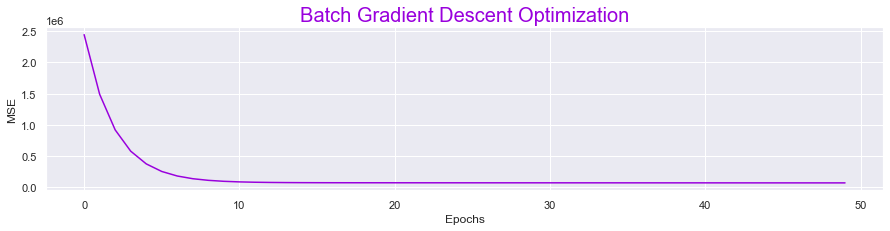

In [27]:
plt.figure(figsize=(15,3))
plt.plot(range(len(mse)), mse, color = '#90d')
plt.title('Batch Gradient Descent Optimization', fontSize=20, color = '#90d')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Stochastic Gradient Descent

In [22]:

def stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 100, batch_size=1):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        #updating parameters m and b
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

MSE: 50868.26090109355


<ipython-input-23-104eb4e9383b>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Stochastic Gradient Descent Optimization', fontSize=14, color = '#90d')


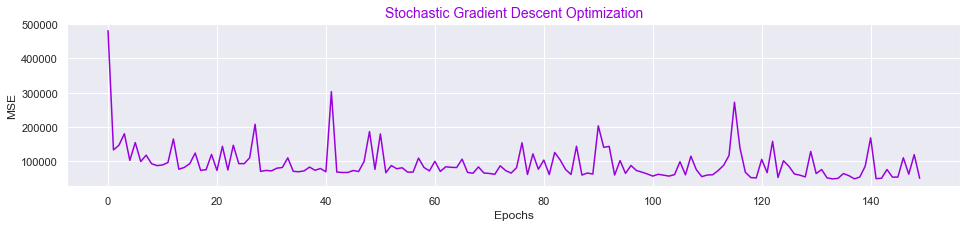

In [23]:
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 150, batch_size=2)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse, color = '#90d')
plt.title('Stochastic Gradient Descent Optimization', fontSize=14, color = '#90d')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()